<a href="https://colab.research.google.com/github/blackcode-creator/DeepLearning_interpet_Signlanguage/blob/main/DeepLearningUsingSignLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

#Applying the deep Learning
import keras

#We use Sequential to create models layer-by-layer. 
from keras.models import Sequential

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

#Dense Layer is used to classify image based on output from convolutional layers
#Conv2D layers are generally used for achieving high accuracy in image recognition tasks.
#MaxPooling2D for extracting low-level features like edges, points
#Flatten puts multi-dimensional input tensors into a single dimension
#Dropout prevents overfitting
from tensorflow import keras

#Predicting for the accuracy score for the test_images
from sklearn.metrics import accuracy_score

#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
#uploading the files from local storage to cloud
print("Upload your data\n")
uploaded = files.upload()

Upload your data



Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [3]:
#Loading the ASL datasets
train_st = pd.read_csv('sign_mnist_train.csv')
test_st = pd.read_csv('sign_mnist_test.csv')

In [4]:
#Displaying the first rows of the dataframe of sign_mnist_train
train_st.head(30)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [5]:
#Now here we are introducing the dimenionality of the dataframe
#The dataset is represented in form of 1 pixel which is 1 p to 784 pixel which is 28 * 28 = 784
train_st.shape

(27455, 785)

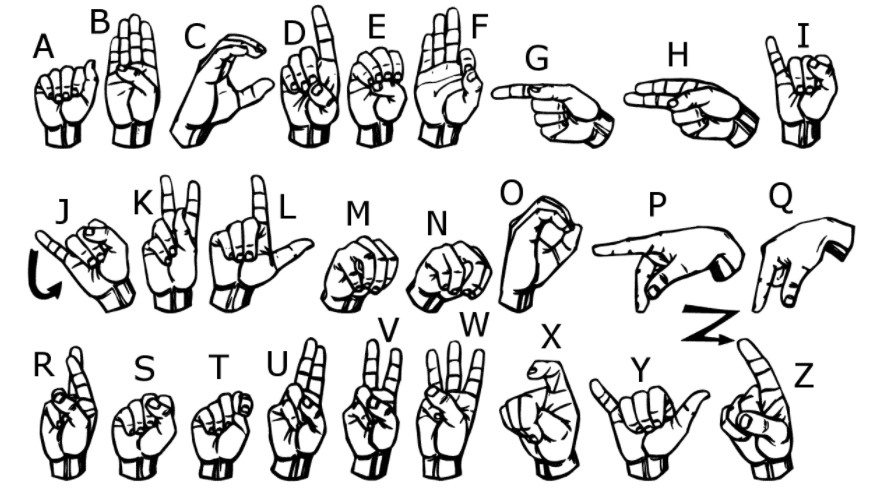

In [6]:
#lets see how the asl signs look like
image = cv2.imread('american_sign_language.PNG')
cv2_imshow( image)

In [7]:
#Each letter indicates a sign on different fingers. 
#We will apply deep learning to these images to make sure our model can understand what sign indicated which finger

labels = train_st['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

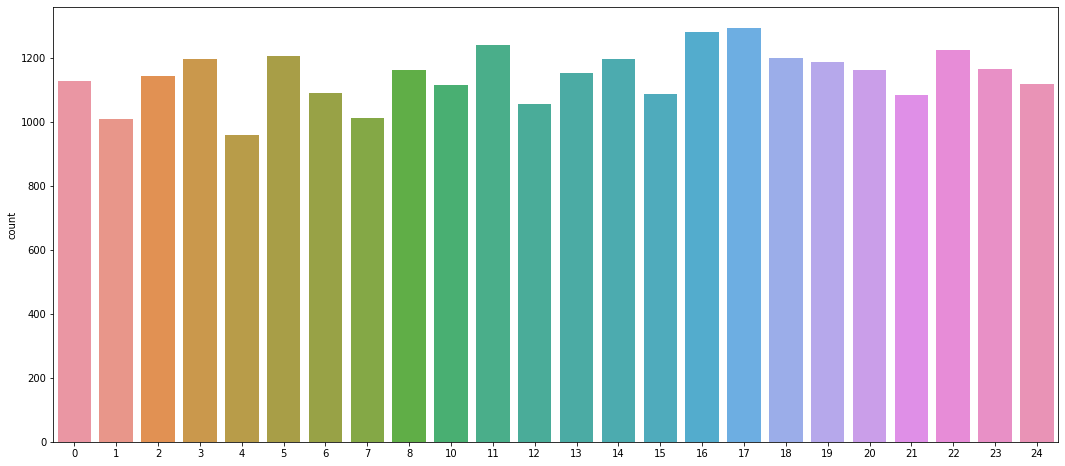

In [8]:
#Data Exploration and Visualization
#We will use seaborn for making statistical graphics
#As you can see each one is almost equally distributed on the below graphic

plt.figure(figsize =(18,8))
sns.countplot(x = labels)

In [9]:
#We are droping the label coloumn from the training set
train_st.drop('label', axis = 1, inplace = True)

In [10]:
#Re Shaping the images gives the new shape to the array without changing the data
#Flattening the array be collapsing given array into one dimension.
images = train_st.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [11]:
#Since our target variable are in categorical(nomial) so we are using label binarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [12]:
#after preprocessing the data to the correct format after flatten
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

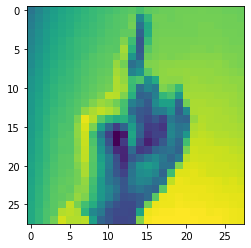

In [13]:
#Lets see how the image look
plt.imshow(images[0].reshape(28,28))

In [14]:
#We are now Spliting the dataset into train(70%) and (30%) test
# The training data is contained in x_train and y_train , while the data for testing is in x_test and y_test .
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state =101)

In [15]:
#Now we are applying Deep Learning from HERE by using KERAS Library.
#We start by creating the batch size to 128 and using 50 epochs

batch_size = 128
num_classes = 24
epochs = 50

In [16]:
#Normalizing the training and test data

x_train = x_train / 255
x_test = x_test / 255


In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [18]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

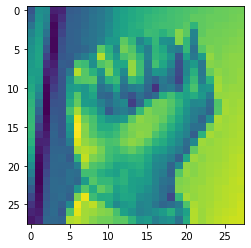

In [19]:
#Visualizing the image after normalizing

plt.imshow(x_train[0].reshape(28,28))

In [20]:
#CNN Model convolutional neural network ype of artificial neural network used in image recognition and processing that is specifically designed to process pixel data.
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# changing multidimensional tensor to single array
model.add(Flatten()) 
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

#Softmax converts a vector of values to a probability distribution.
model.add(Dense(num_classes, activation = 'softmax'))



In [21]:
#Compling the model and training data
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/50
151/151 [==============================] - 27s 173ms/step - loss: 2.5044 - accuracy: 0.2279 - val_loss: 1.5117 - val_accuracy: 0.5218
Epoch 2/50
151/151 [==============================] - 28s 183ms/step - loss: 1.1970 - accuracy: 0.6006 - val_loss: 0.7317 - val_accuracy: 0.7765
Epoch 3/50
151/151 [==============================] - 28s 184ms/step - loss: 0.6821 - accuracy: 0.7693 - val_loss: 0.4405 - val_accuracy: 0.8629
Epoch 4/50
151/151 [==============================] - 28s 184ms/step - loss: 0.4349 - accuracy: 0.8562 - val_loss: 0.2625 - val_accuracy: 0.9194
Epoch 5/50
151/151 [==============================] - 28s 184ms/step - loss: 0.2927 - accuracy: 0.9028 - val_loss: 0.1649 - val_accuracy: 0.9520
Epoch 6/50
151/151 [==============================] - 28s 183ms/step - loss: 0.2107 - accuracy: 0.9296 - val_loss: 0.1044 - val_accuracy: 0.9744
Epoch 7/50
151/151 [==============================] - 27s 182ms/step - loss: 0.1423 - accuracy: 0.9553 - val_loss: 0.0560 - val_ac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

<function matplotlib.pyplot.show>

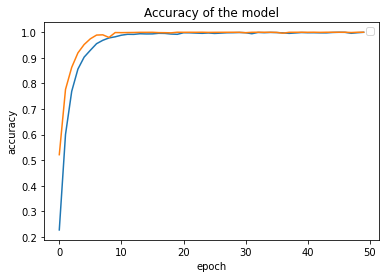

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend('train','test')

plt.show
#As you can see, the number of epochs increase the accuracy also increases.

In [26]:
# Validating the model with test data to see its performance
test_label = test_st['label']

KeyError: ignored

In [25]:
#Droping the label column
test_st.drop('label', axis = 1, inplace = True )

In [27]:
test_images = test_st.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [28]:
#is used on the training data so that we can scale the training data and also learn the scaling parameters of that data
test_label = label_binarizer.fit_transform(test_label)

In [30]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [31]:
test_images.shape

(7172, 28, 28, 1)

In [32]:
#predicting the accuracy of the model
y_pred = model.predict(test_images)

In [42]:
#Output the accuracy of the model
print('The percentage accuracy for the prediction is: -',accuracy_score(test_label,y_pred.round())*100)

The percentage accuracy for the prediction is: - 85.95928611266035
